# Single Qubit circuits

In [1]:
import numpy as np
from qiskit import *


In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(1)


In [4]:
# Add a H gate on qubit 0, putting this qubit in superposition.
# circ.h(0)
# circ.h(0)
circ.x(0)
# circ.y(0)
# circ.z(0)

# hx xh h

### Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form found in many textbooks.

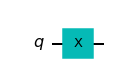

In [5]:
circ.draw('mpl')

In this circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

## Simulating circuits using Qiskit Aer <a name='simulation'></a>


## Statevector backend

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the quantum 
state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

In [6]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [7]:
# Create a Quantum Program for execution 
job = backend.run(circ)

When you run a program, a job object is made that has the following two useful methods: 
`job.status()` and `job.result()`, which return the status of the job and a result object, respectively.

<div class="alert alert-block alert-info">
<b>Note:</b> Jobs run asynchronously, but when the result method is called, it switches to synchronous and waits for it to finish before moving on to another task.
</div>

In [8]:
result = job.result()

The results object contains the data and Qiskit provides the method 
`result.get_statevector(circ)` to return the state vector for the quantum circuit.

In [9]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
outputstate.draw('latex')



# from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
# state = Statevector.from_int(0, 2**1)

# # Evolve the state by the quantum circuit
# state = state.evolve(circ)

#draw using latex
# state.draw('latex')

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


<IPython.core.display.Latex object>

In [10]:
import math
1/math.sqrt(2)

0.7071067811865475

# Visualization
Qiskit also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state density matrix $\rho$.


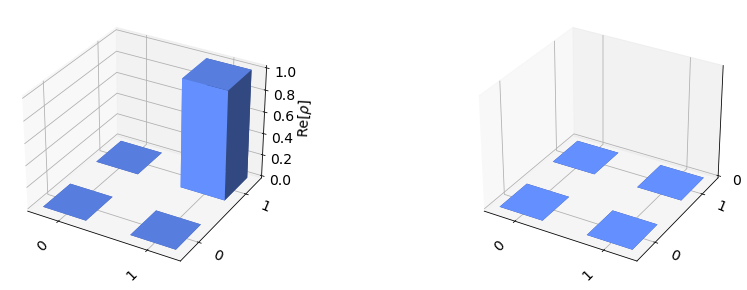

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

### OpenQASM backend

In [12]:
# Create a Quantum Circuit
meas = QuantumCircuit(1, 1)
meas.h(0)
# meas.y(0)
# map the quantum measurement to the classical bits
meas.measure(range(1), range(1))

#drawing the circuit
meas.draw()

┌───┐┌─┐
q: ┤ H ├┤M├
   └───┘└╥┘
c: ══════╩═

In [13]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(meas, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [14]:
counts = result_sim.get_counts(meas)
print(counts)

{'1': 522, '0': 502}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

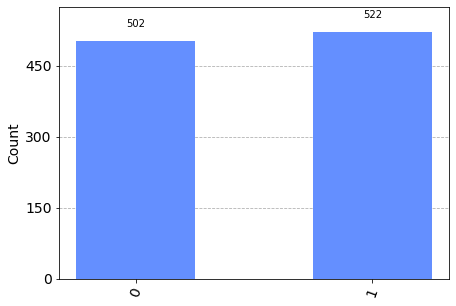

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

# Bell State

In [16]:
bellCirc=QuantumCircuit(2,2)
bellCirc.h(0)
bellCirc.cnot(0,1)

In [17]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(bellCirc)

In [18]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(bellCirc)

In [19]:
result = job.result()

In [20]:
outputstate = result.get_statevector(bellCirc, decimals=3)
print(outputstate)
outputstate.draw('latex')

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

## bell state qasm

In [21]:
bellCirc=QuantumCircuit(2,2)
bellCirc.h(0)
bellCirc.cnot(0,1)
bellCirc.measure(range(2), range(2))
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = backend_sim.run(transpile(bellCirc, backend_sim), shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(bellCirc)
print(counts)

{'11': 517, '00': 507}


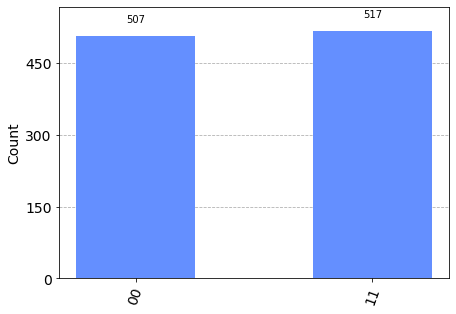

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# GHZ State 

In [23]:
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

# GHZ with OpenQasm

In [24]:
# Create a Quantum Circuit
ghz = QuantumCircuit(3, 3)
ghz.h(0)
ghz.cnot(0,1)
ghz.cnot(0,2)
# map the quantum measurement to the classical bits
ghz.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.

#drawing the circuit
ghz.draw()

┌───┐             ┌─┐   
q_0: ┤ H ├──■────■─────┤M├───
     └───┘┌─┴─┐  │  ┌─┐└╥┘   
q_1: ─────┤ X ├──┼──┤M├─╫────
          └───┘┌─┴─┐└╥┘ ║ ┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c_0: ════════════════╬══╩══╬═
                     ║     ║ 
c_1: ════════════════╩═════╬═
                           ║ 
c_2: ══════════════════════╩═

In [25]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(ghz, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [26]:
counts = result_sim.get_counts(ghz)
print(counts)

{'111': 489, '000': 535}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

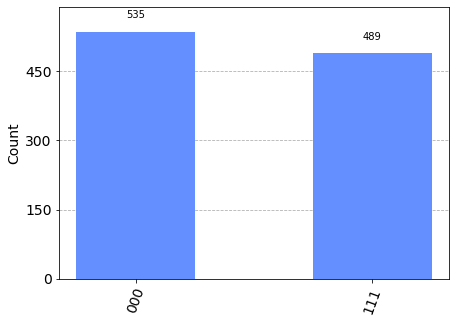

In [27]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Quantum Teleportation

In [28]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


/tmp/ipykernel_220/2220139973.py:7: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification import marginal_counts


In [29]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target


In [30]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw()


q_0: ──────────
     ┌───┐     
q_1: ┤ H ├──■──
     └───┘┌─┴─┐
q_2: ─────┤ X ├
          └───┘
crz: ══════════
               
crx: ══════════

In [31]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()


░      ┌───┐
q_0: ───────────░───■──┤ H ├
     ┌───┐      ░ ┌─┴─┐└───┘
q_1: ┤ H ├──■───░─┤ X ├─────
     └───┘┌─┴─┐ ░ └───┘     
q_2: ─────┤ X ├─░───────────
          └───┘ ░           
crz: ═══════════════════════
                            
crx: ═══════════════════════

In [32]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)


In [33]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()


░      ┌───┐ ░ ┌─┐   
q_0: ───────────░───■──┤ H ├─░─┤M├───
     ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
q_2: ─────┤ X ├─░────────────░──╫──╫─
          └───┘ ░            ░  ║  ║ 
crz: ═══════════════════════════╩══╬═
                                   ║ 
crx: ══════════════════════════════╩═

In [34]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'


In [35]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw()


░      ┌───┐ ░ ┌─┐    ░           
q_0: ───────────░───■──┤ H ├─░─┤M├────░───────────
     ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░           
q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────
     └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌───┐┌───┐
q_2: ─────┤ X ├─░────────────░──╫──╫──░─┤ X ├┤ Z ├
          └───┘ ░            ░  ║  ║  ░ └─╥─┘└─╥─┘
crz: ═══════════════════════════╩══╬══════╬════■══
                                   ║      ║   0x1 
crx: ══════════════════════════════╩══════■═══════
                                         0x1

# Testing quantum teleportation

<IPython.core.display.Latex object>

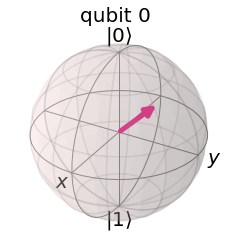

In [36]:
# Create random 1-qubit state
psi = random_statevector(2)

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)


In [37]:
init_gate = Initialize(psi)
init_gate.label = "init"


In [38]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw()


┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(-0.18481-0.63972j,0.18542+0.72265j) ├─░────────────░───■──┤ H ├─░─»
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                  ░      └───┘ ░            ░ »
crz: ═════════════════════════════════════════════════════════════════════════»
                                                                              »
crx: ═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐             
«q_0: ┤M├─────────────
«     └╥┘┌─┐          
«q_1: ─╫─┤M├──────────
«      ║ └╥┘┌───┐┌───┐
«q_2: ─╫──╫─┤ X ├┤ Z ├
«      ║  ║ └─╥─┘└─╥─┘
«crz: ═╩══╬═══╬════■══
«         ║   ║   0x1 
«crx: ════╩═══■═══════
«            0x1

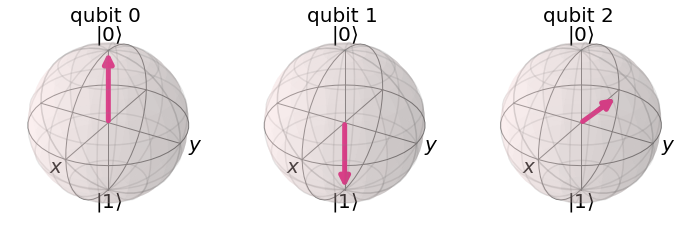

In [39]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)


In [40]:
inverse_init_gate = init_gate.gates_to_uncompute()


In [41]:
## SETUP
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
# First, let's initialize Alice's q0
qc.append(init_gate, [0])
qc.barrier()

## STEP 1
# Now begins the teleportation protocol
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)

## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

## STEP 5
# reverse the initialization process
qc.append(inverse_init_gate, [2])

# Display the circuit
qc.draw()


┌──────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
q_0: ┤ init(-0.18481-0.63972j,0.18542+0.72265j) ├─░────────────░───■──┤ H ├─░─»
     └──────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
q_1: ─────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                  ░ └───┘┌─┴─┐ ░ └───┘      ░ »
q_2: ─────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                  ░      └───┘ ░            ░ »
crz: ═════════════════════════════════════════════════════════════════════════»
                                                                              »
crx: ═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐                             
«q_0: ┤M├─────────────────────────────
«     └╥┘┌─┐                          
«q_1: ─╫─┤M├──────────────────────────
«      ║ └╥┘┌───┐┌───┐┌──────────────┐
«q_2: ─╫──╫─┤ X ├┤ Z ├┤ disentangler ├
«      ║  ║ └─╥─┘└─╥─┘└──────────────┘
«crz: ═╩══╬═══╬════■══════════════════
«         ║   ║   0x1                 
«crx: ════╩═══■═══════════════════════
«            0x1

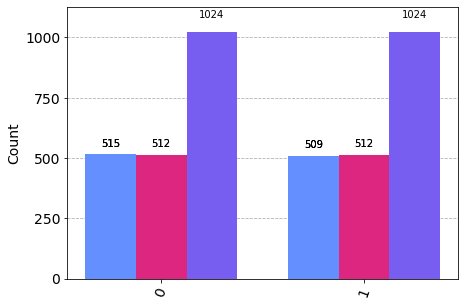

In [42]:
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)
